In [2]:
!pip install p_tqdm

     |████████████████████████████████| 81 kB 3.1 MB/s 
     |████████████████████████████████| 65 kB 2.6 MB/s 
  Created wheel for p-tqdm: filename=p_tqdm-1.3.3-py3-none-any.whl size=3987 sha256=53e48a07773f0c71268d508215f468467bfc366964059d01eb7ef54a036506f3
  Stored in directory: /root/.cache/pip/wheels/57/6c/d6/8c4cc7d253ecfdfe0fb49f5a754d33e9c2ce1664935325b1b6
Successfully built p-tqdm


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial 
from p_tqdm import p_map
from sklearn import linear_model, model_selection
import tensorflow as tf 

In [38]:
path_to_dataset = '/content/house-votes-84.data'

data = (np.genfromtxt(path_to_dataset, delimiter=',', dtype=object, unpack=True)).T
print(data)

[[b'republican' b'n' b'y' ... b'y' b'n' b'y']
 [b'republican' b'n' b'y' ... b'y' b'n' b'?']
 [b'democrat' b'?' b'y' ... b'y' b'n' b'n']
 ...
 [b'republican' b'n' b'?' ... b'y' b'n' b'y']
 [b'republican' b'n' b'n' ... b'y' b'n' b'y']
 [b'republican' b'n' b'y' ... b'y' b'?' b'n']]


In [39]:
Y = data[:, 0]
#Changed to 0 for Neural Network. Change to -1 for other methods 
Y = np.array([1 if i == b'democrat' else 0 for i in Y]).astype('int8')
print(Y)

[0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0
 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1
 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0
 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0]


In [40]:
X = data[:, 1:]
for index, column in enumerate(X): 
    new_column = []
    for i in column:
        encoded_val = 0
        if i == b'y':
            encoded_val = 1
        elif i == b'n':
            encoded_val = -1
        new_column.append(encoded_val)
    X[index] = new_column
X = X.astype('int8')
print(X)

[[-1  1 -1 ...  1 -1  1]
 [-1  1 -1 ...  1 -1  0]
 [ 0  1  1 ...  1 -1 -1]
 ...
 [-1  0 -1 ...  1 -1  1]
 [-1 -1 -1 ...  1 -1  1]
 [-1  1 -1 ...  1  0 -1]]


In [41]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [42]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(11, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
loss_fn = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100000, callbacks=[callback])

Epoch 1/100000
11/11 [==============================] - 1s 4ms/step - loss: 0.5299 - accuracy: 0.8534
Epoch 2/100000
11/11 [==============================] - 0s 5ms/step - loss: 0.4695 - accuracy: 0.8793
Epoch 3/100000
11/11 [==============================] - 0s 4ms/step - loss: 0.4192 - accuracy: 0.8937
Epoch 4/100000
11/11 [==============================] - 0s 4ms/step - loss: 0.3773 - accuracy: 0.8908
Epoch 5/100000
11/11 [==============================] - 0s 4ms/step - loss: 0.3410 - accuracy: 0.8966
Epoch 6/100000
11/11 [==============================] - 0s 5ms/step - loss: 0.3095 - accuracy: 0.9023
Epoch 7/100000
11/11 [==============================] - 0s 4ms/step - loss: 0.2823 - accuracy: 0.9080
Epoch 8/100000
11/11 [==============================] - 0s 5ms/step - loss: 0.2581 - accuracy: 0.9109
Epoch 9/100000
11/11 [==============================] - 0s 4ms/step - loss: 0.2373 - accuracy: 0.9109
Epoch 10/100000
11/11 [==============================] - 0s 4ms/step - loss: 0.219

In [43]:
model.evaluate(X_test, Y_test, verbose=2)

3/3 - 0s - loss: 0.2052 - accuracy: 0.9540 - 197ms/epoch - 66ms/step


[0.20516875386238098, 0.954023003578186]

In [ ]:
# compute the weight matrix W for the vertices of our graph 
def eta(tt, rr):

 val = np.exp( - (tt**2)/(2*rr**2) ) 
  
 return val
  


dist = scipy.spatial.distance_matrix(X, X, p = 2)

def spectral_clustering(r):
    W = eta(dist, r)
    # compute Laplacian matrices 
    d = np.sum(W, axis=1) # degree vector

    D = np.diag(d)
    Ds = np.diag(1/np.sqrt(d))

    Ln = np.dot(Ds, np.dot((D - W),Ds)) # normalized
    # compute eigendecompositions 

    # we need to sort the eigenvalues and vectors 

    lln, VVn = np.linalg.eigh(Ln)

    idxn = lln.argsort()
    Vn = VVn[:, idxn]

    q1 = Vn[:, 1]
    q1 = np.sign(q1)
    num_incorrect = np.sum(q1 != Y)
    clustering_accuracy = 1 - (1/435) * num_incorrect
    if clustering_accuracy < 0.5:
        clustering_accuracy = 1 - clustering_accuracy
    return clustering_accuracy

  0%|          | 0/1000 [00:00<?, ?it/s]

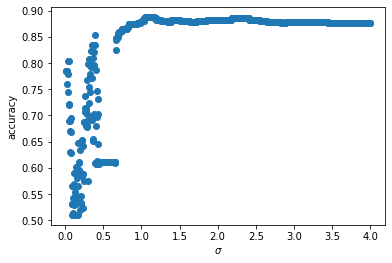

In [ ]:
inputs = np.linspace(0.008, 4, 1000)
results = p_map(spectral_clustering, inputs)
fig, ax = plt.subplots()
ax.set_xlabel('$\sigma$')
ax.set_ylabel('accuracy')
ax.scatter(inputs, results)
fig.savefig('sigma_accuracy.png')

In [ ]:
sigma_star = inputs[np.argmax(results)]
accuracy = spectral_clustering(sigma_star)
print(f'Best Sigma is {sigma_star} with best accuracy {accuracy}')

Best Sigma is 1.050954954954955 with best accuracy 0.8873563218390804


In [ ]:
W = eta(dist, sigma_star)
    # compute Laplacian matrices 
d = np.sum(W, axis=1) # degree vector

D = np.diag(d)
Ds = np.diag(1/np.sqrt(d))

Ln = np.dot(Ds, np.dot((D - W),Ds)) # normalized
    # compute eigendecompositions 

    # we need to sort the eigenvalues and vectors 

lln, VVn = np.linalg.eigh(Ln)

idxn = lln.argsort()
Vn = VVn[:, idxn]

accuracy with M = 1 and J = 1: 0.38620689655172413
accuracy with M = 1 and J = 2: 0.38620689655172413
accuracy with M = 1 and J = 3: 0.38620689655172413
accuracy with M = 1 and J = 4: 0.38620689655172413
accuracy with M = 1 and J = 5: 0.38620689655172413
accuracy with M = 1 and J = 6: 0.38620689655172413
accuracy with M = 1 and J = 7: 0.38620689655172413
accuracy with M = 1 and J = 8: 0.38620689655172413
accuracy with M = 1 and J = 9: 0.38620689655172413
accuracy with M = 1 and J = 10: 0.38620689655172413
accuracy with M = 1 and J = 11: 0.38620689655172413
accuracy with M = 1 and J = 12: 0.38620689655172413
accuracy with M = 1 and J = 13: 0.38620689655172413
accuracy with M = 1 and J = 14: 0.38620689655172413
accuracy with M = 1 and J = 15: 0.38620689655172413
accuracy with M = 1 and J = 16: 0.38620689655172413
accuracy with M = 1 and J = 17: 0.38620689655172413
accuracy with M = 1 and J = 18: 0.38620689655172413
accuracy with M = 1 and J = 19: 0.38620689655172413
accuracy with M = 1 a

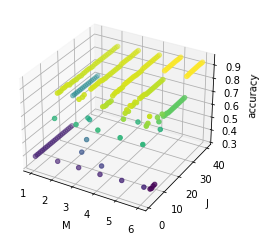

In [ ]:
M = np.arange(1, 7, 1) #[2, 3, 4, 5, 6]
J = np.arange(1, 41, 1)#[5, 10, 20, 40]
results = []
def get_semi_supervised_accuracy(M, J):
  F = Vn[:, 0:M]
  A = F[0:J, 0:M]
  b = Y[0:J]
  SSLRidge = linear_model.Ridge(alpha = 1e-8, fit_intercept=False)
  SSLRidge.fit(A, b)

  coefficients = SSLRidge.coef_
  Y_pred = np.sign(np.dot(F, coefficients))

  accuracy = 1 - (1/435) * np.sum(Y_pred != Y)
  print(f'accuracy with M = {M} and J = {J}: {accuracy}')
  return accuracy

for i in M:
  temp_arr = []
  for j in J:
    temp_arr.append(get_semi_supervised_accuracy(i, j))
  results.append(temp_arr)
  j, m = np.meshgrid(J, M)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(m, j, np.array(results), c=np.array(results))
ax.set_xlabel('M')
ax.set_ylabel('J')
ax.set_zlabel('accuracy')
fig.savefig('M_J_accuracyLotPoints.png')

accuracy with M = 2 and J = 5: 0.8827586206896552
accuracy with M = 2 and J = 10: 0.8781609195402299
accuracy with M = 2 and J = 20: 0.8850574712643678
accuracy with M = 2 and J = 40: 0.8850574712643678
accuracy with M = 3 and J = 5: 0.8827586206896552
accuracy with M = 3 and J = 10: 0.8919540229885058
accuracy with M = 3 and J = 20: 0.8873563218390804
accuracy with M = 3 and J = 40: 0.8942528735632184
accuracy with M = 4 and J = 5: 0.8620689655172413
accuracy with M = 4 and J = 10: 0.8873563218390804
accuracy with M = 4 and J = 20: 0.8988505747126436
accuracy with M = 4 and J = 40: 0.9011494252873563
accuracy with M = 5 and J = 5: 0.8827586206896552
accuracy with M = 5 and J = 10: 0.8873563218390804
accuracy with M = 5 and J = 20: 0.8735632183908046
accuracy with M = 5 and J = 40: 0.9264367816091954
accuracy with M = 6 and J = 5: 0.8827586206896552
accuracy with M = 6 and J = 10: 0.8229885057471265
accuracy with M = 6 and J = 20: 0.7839080459770115
accuracy with M = 6 and J = 40: 0.93

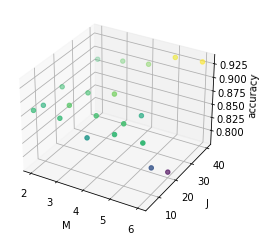

In [ ]:
M = [2, 3, 4, 5, 6]
J = [5, 10, 20, 40]
results = []
def get_semi_supervised_accuracy(M, J):
  F = Vn[:, 0:M]
  A = F[0:J, 0:M]
  b = Y[0:J]
  SSLRidge = linear_model.Ridge(alpha = 1e-8, fit_intercept=False)
  SSLRidge.fit(A, b)

  coefficients = SSLRidge.coef_
  Y_pred = np.sign(np.dot(F, coefficients))

  accuracy = 1 - (1/435) * np.sum(Y_pred != Y)
  print(f'accuracy with M = {M} and J = {J}: {accuracy}')
  return accuracy

for i in M:
  temp_arr = []
  for j in J:
    temp_arr.append(get_semi_supervised_accuracy(i, j))
  results.append(temp_arr)
  j, m = np.meshgrid(J, M)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(m, j, np.array(results), c=np.array(results))
ax.set_xlabel('M')
ax.set_ylabel('J')
ax.set_zlabel('accuracy')
fig.savefig('M_J_accuracyFewPoints.png')

In [ ]:
test = np.argmax(np.array(results))
J_star = test % len(J) + 1
M_star =  int(test / len(J)) + 1
print(f'J = {test % len(J) + 1}')
print(f'M = {int(test / len(J)) + 1}')
print(f'accuracy is {np.array(results)[M_star - 1][J_star - 1]}')

J = 4
M = 5
accuracy is 0.9310344827586207
